In [67]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

---
# 1. Frame it

In [117]:
image = cv2.imread('data/MeAndTuco.jpg')
height, width = image.shape[:2]
scaling_factor = 1080 / max(height, width)
new_size = (int(width * scaling_factor), int(height * scaling_factor))
resized_image = cv2.resize(image, new_size)
resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

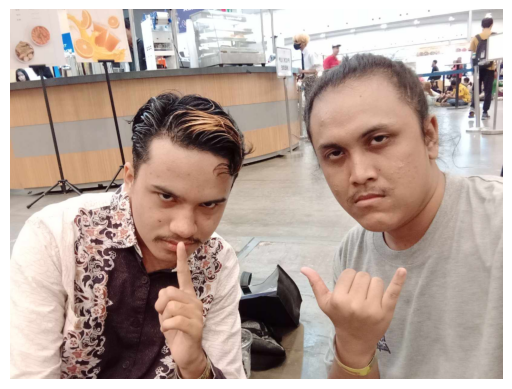

In [118]:
plt.imshow(resized_image_rgb)
plt.axis('off')
plt.show()

In [119]:
frame_thickness = 25 + 48
yellow_color = [255, 255, 0]
image_with_frame = cv2.copyMakeBorder(
    resized_image_rgb, frame_thickness, frame_thickness, frame_thickness, frame_thickness, cv2.BORDER_CONSTANT, value=yellow_color
)

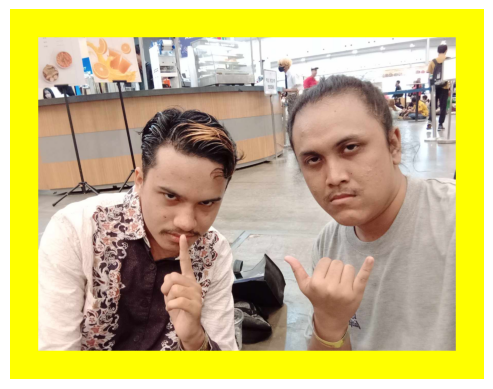

In [120]:
plt.imshow(image_with_frame)
plt.axis('off')
plt.show()

framed_unmodified = image_with_frame.copy()

In [121]:
red_channel = image_with_frame[:, :, 0]
red_mask = (red_channel >= 50) & (red_channel <= 150)
red_channel[red_mask] = np.clip(red_channel[red_mask] + 20, 0, 255)

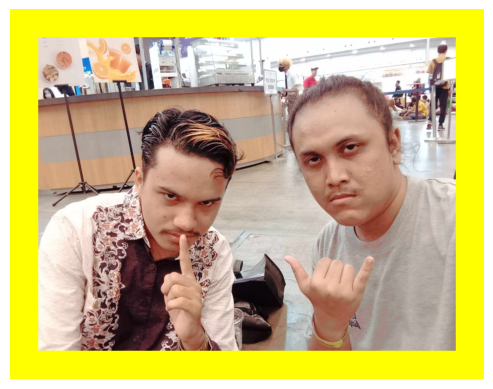

In [122]:
plt.imshow(image_with_frame)
plt.axis('off')
plt.show()

In [123]:
blue_channel = image_with_frame[:, :, 2]
blue_mask = (blue_channel >= 200) & (blue_channel <= 250)
blue_channel[blue_mask] = np.clip(blue_channel[blue_mask] - 20, 0, 255)

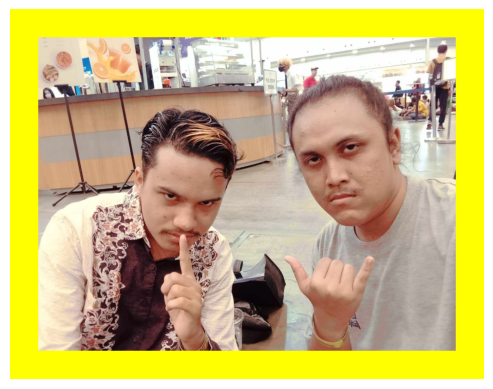

In [124]:
plt.imshow(image_with_frame)
plt.axis('off')
plt.show()

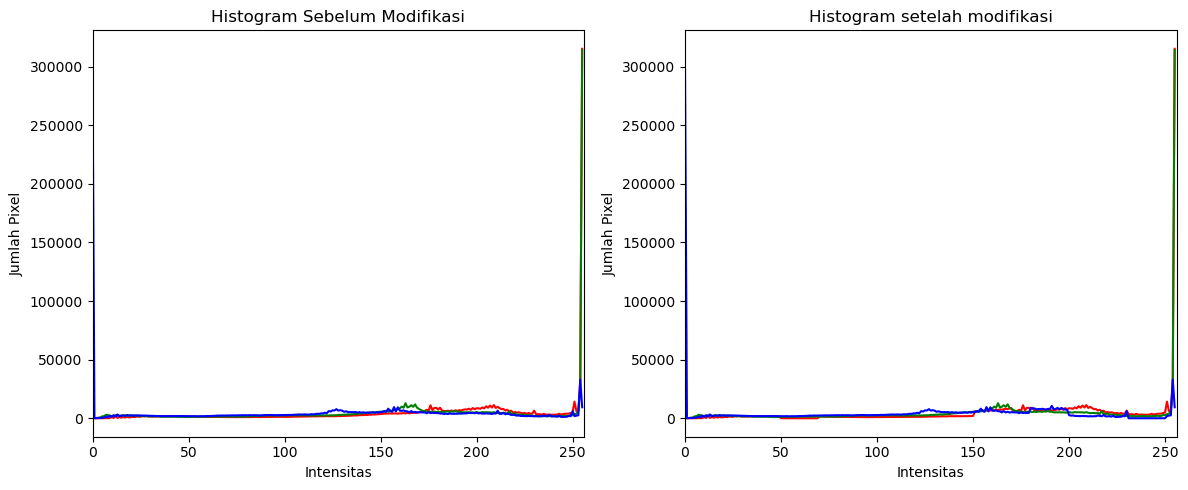

In [125]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([framed_unmodified], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Histogram Sebelum Modifikasi')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')

plt.subplot(1, 2, 2)
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([image_with_frame], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])
plt.title('Histogram setelah modifikasi')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')

plt.tight_layout()
plt.show()

### Hasil eksperimen
- Karena intensitas channel merah dinaikkan, kelopak mata terlihat lebih intens, sehingga kami terlihat seperti antagonis film slasher.
- Karena intensitas channel biru diturunkan, gambar terlihat lebih kuning, paling terlihat di bagian kiri gambar di bahu kanan baju batik.

---
# 2. Two-tone

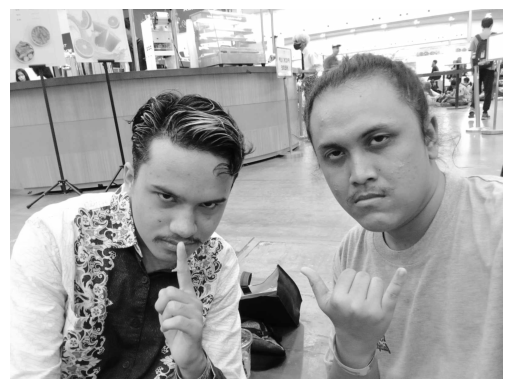

In [126]:
image = cv2.imread('data/MeAndTuco.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.axis('off')
plt.show()

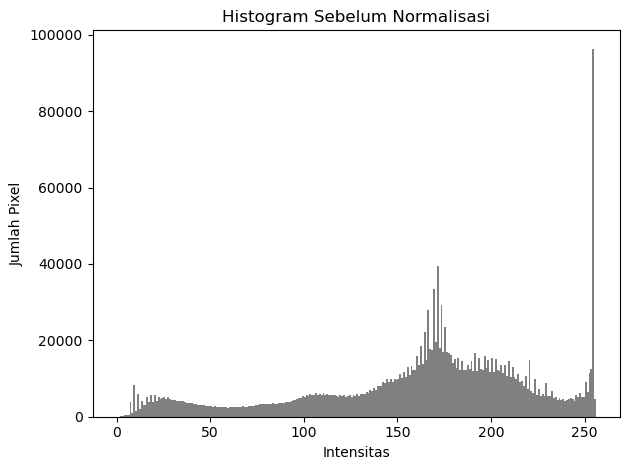

In [127]:
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Sebelum Normalisasi')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')



plt.tight_layout()
plt.show()

(-0.5, 1631.5, 1223.5, -0.5)

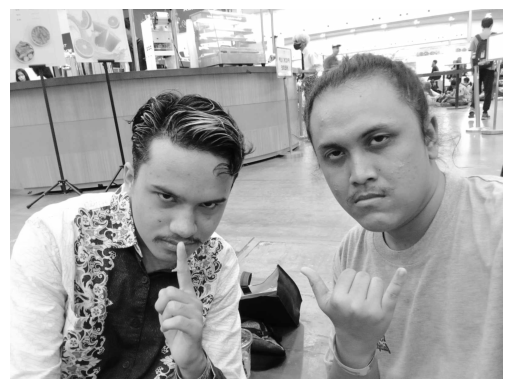

In [128]:
min_intensity = np.min(image_gray)
max_intensity = np.max(image_gray)
normalized_gray = ((image_gray - min_intensity) * (255.0 / (max_intensity - min_intensity))).astype(np.uint8)


plt.imshow(normalized_gray, cmap='gray')
plt.axis('off')

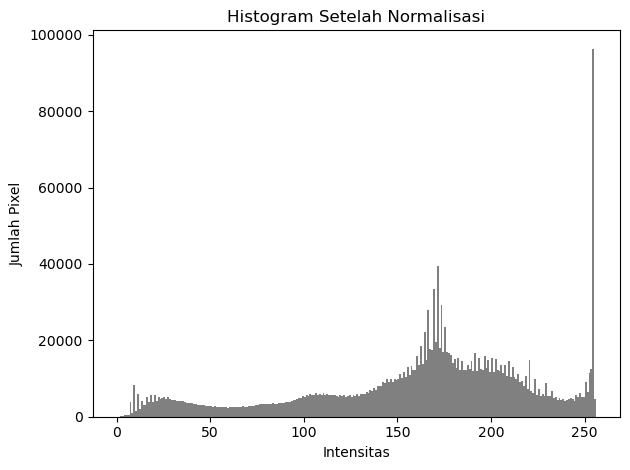

In [129]:
plt.hist(normalized_gray.ravel(), bins=256, range=[0, 256], color='gray')
plt.title('Histogram Setelah Normalisasi')
plt.xlabel('Intensitas')
plt.ylabel('Jumlah Pixel')

plt.tight_layout()
plt.show()

(-0.5, 1631.5, 1223.5, -0.5)

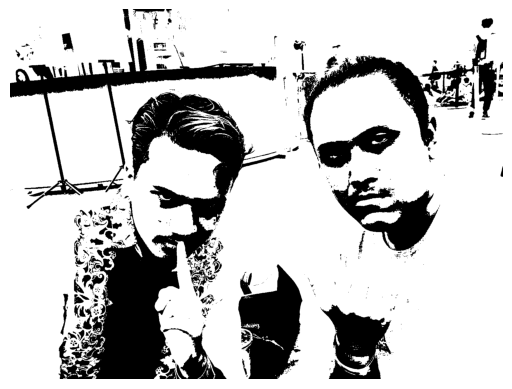

In [130]:
pixel_art = np.where(normalized_gray < 128, 0, 255).astype(np.uint8)

plt.imshow(pixel_art, cmap='gray')  # Menambahkan cmap='gray'
plt.axis('off')

---
# 3. H, S, V

In [131]:
image = cv2.imread('data/MeAndTuco.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [132]:
img1_edit = image_rgb.copy()

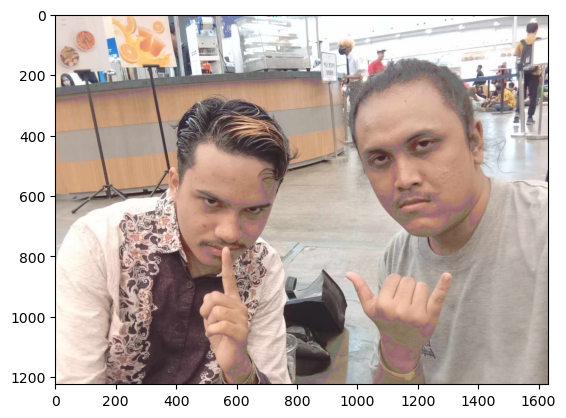

In [133]:

for row in range(img1_edit.shape[0]):
    for col in range(img1_edit.shape[1]):
        
        if img1_edit[row, col, 0] < 100:
            img1_edit[row, col, 0] += 30

        if img1_edit[row, col, 1] < 100:
            img1_edit[row, col, 1] += 30

        if img1_edit[row, col, 2] < 100:
            img1_edit[row, col, 2] += 30

plt.imshow(img1_edit)


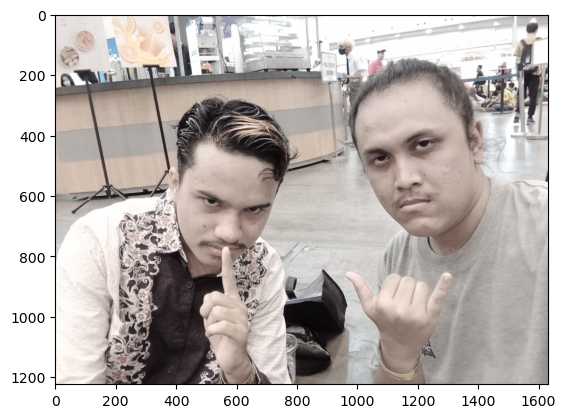

In [134]:
img_satedit = image_rgb.copy()

hsv_image = cv2.cvtColor(img_satedit, cv2.COLOR_RGB2HSV)
saturation_factor = 0.4
hsv_image[..., 1] = np.clip(hsv_image[..., 1] * saturation_factor, 0, 255) 
saturated_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

plt.imshow(saturated_image)

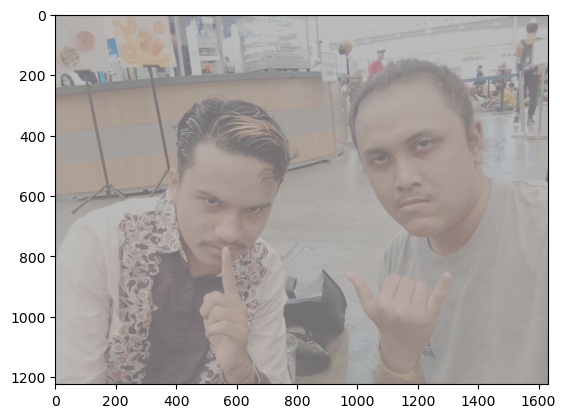

In [135]:
img_intsedit = image_rgb.copy()

mean_intensity = np.mean(img_intsedit)
contrast_factor = 0.3
contrast_image = np.clip(mean_intensity + contrast_factor * (img_intsedit - mean_intensity), 0, 255).astype(np.uint8)

plt.imshow(contrast_image)